# Tutorial on hyperbolic surfaces

A *hyperbolic surface with cusps* is a topological surface together with a hyperbolic structure of finite area. `polymake` can deal with hyperbolic surfaces in view of Penners coordinates of the decorated Teichmüller space (lambda lengths). These allow to pick a hyperbolic surface by choosing a triangulation of the surface along with one positive parameter for each edge.


The [secondary fan](https://arxiv.org/abs/1708.08714v1) of a hyperbolic surface stratifies the space of weight vectors (horocyclic decorations) according to which Delaunay triangulations are induced by the Epstein-Penner convex hull construction.
For each point on the surface, there is a [secondary polyhedron](https://arxiv.org/abs/1708.08714v1) whose normal fan is the secondary fan.


This tutorial shows how to deal with secondary fans and secondary polyhedra of hyperbolic surfaces.


### Construction of hyperbolic surfaces

To define a hyperbolic surface we need to specify (a) a triangulation and (b) Penner coordinates. 

(a)
The triangulation is obtained by specifying the `DCEL_DATA` as an `Array<Array<Int>>`. 
This constructs a doubly connected edge list as follows:
Each row of `DCEL_DATA` reads { (*2i*).head , (*2i+1*).head , (*2i*).next , (*2i+1*).next }.
In general, for each edge *i* of the triangulation there are two half edges *2i* and *2i+1*, one for each orientation.
   
(b)
The `PENNER_COORDINATES` assign a positive rational number to each edge of the triangulation, ordered in the same sense as prescribed by the `DCEL_DATA`.



### Example 1: hyperbolic sphere with three cusps

In [1]:
application 'fan';
application 'topaz';

In [2]:
$S3 = new Array<Array<Int>>([[1,0,2,5],[2,1,4,1],[0,2,0,3]]);
$s = new HyperbolicSurface(DCEL_DATA=>$S3,PENNER_COORDINATES=>[1,1,1]);

In this example the doubly connected edge list looks like this:
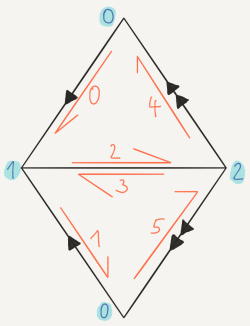


### The secondary fan

The secondary fan of the hyperbolic sphere from above can now be computed as follows.

In [3]:
$f = $s->SECONDARY_FAN;
$f->properties;

type: PolyhedralFan<Rational>

MAXIMAL_CONES
{0 1 2}
{0 1 3}
{1 2 4}
{0 2 5}


RAYS
0 1 1
1 0 1
1 1 0
0 0 1
1 0 0
0 1 0



Click here for additional output 
 
polymake: used package cdd
 cddlib
 Implementation of the double description method of Motzkin et al.
 Copyright by Komei Fukuda.
 http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/

In [4]:
$f->VISUAL;

<!--
polymake for knusper
Thu Aug 27 11:35:23 2020
fan:
-->


 
 
 
 fan: 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.

In [5]:
$s->properties;

name: s
type: HyperbolicSurface

DCEL_DATA
1 0 2 5
2 1 4 1
0 2 0 3


FLIP_WORDS
{}
{0}
{1}
{2}


PENNER_COORDINATES
1 1 1

SECONDARY_FAN
type: PolyhedralFan<Rational>


The `FLIP_WORDS` indicate how  to obtain the Delaunay triangulations.
The k-th flip word is a list of integers (the indices of the edges) that describe which edge flips produce the k-th Delaunay triangulation. Note that the k-th Delaunay triangulation also corresponds to the k-th maximal cone of the `SECONDARY_FAN`.

### GKZ vectors & secondary polyhedra

In order to compute `GKZ_VECTORS` or a `secondary_polyhedron` of a hyperbolic surface one needs to additionally specify a `SPECIAL_POINT` on the surface. This is done by choosing two rational numbers.

Continuing with the above example, lets look at the following.

In [6]:
$s = new HyperbolicSurface(DCEL_DATA=>$S3,PENNER_COORDINATES=>[1,1,1],SPECIAL_POINT=>[1,0]);

Now we may compute an approximation of the `GKZ_VECTORS` of the surface. 
The approximation depends on a parameter *depth* that restricts the depth of the (covering) triangles that are summed over in the definition of the GKZ vectors.

In [7]:
print $s->GKZ_VECTORS(3);

1 33346854621/25672050625 33346854621/25672050625 19782163/27238250
1 2361/3250 3955357/5447650 33346854621/25672050625
1 10549213550005124385885122/6365327663846199230365625 11433978/13287625 30327974429709/105771923977850
1 11433978/13287625 10549213550005124385885122/6365327663846199230365625 30327974429709/105771923977850


The secondary polyhedron can be computed similarly using the function `secondary_polyhedron`.

In [8]:
$p = secondary_polyhedron($s,10);
$p->properties;

name: p
type: Polytope<Float>

CONE_AMBIENT_DIM
4

VERTICES
1 1.315301353 1.315301353 0.7316378744
1 0.7316489581 0.7316267908 1.315301353
1 1.752046187 0.8750928112 0.2910011302
1 0.8750928112 1.752046187 0.2910011302
0 -1 0 0
0 0 -1 0
0 0 0 -1


VERTICES_IN_FACETS
{0 1 3 4}
{0 1 2 5}
{0 2 3 6}
{1 4 5}
{2 5 6}
{3 4 6}



In [9]:
$p->VISUAL(FacetColor=>'255 180 80');

<!--
polymake for knusper
Thu Aug 27 11:35:24 2020
p_bounded
-->


 
 
 
 p_bounded 
 
 
 
 
 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

We may look at the GKZ domes of the individual Delaunay triangulations.

In [10]:
$d0 = $s->gkz_dome(0,5);
$d0->VISUAL(FacetColor=>'80 180 255');

<!--
polymake for knusper
Thu Aug 27 11:35:27 2020
pcom:d0
-->


 
 
 
 pcom:d0 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

In [11]:
$d1 = $s->gkz_dome(1,5);
$d1->VISUAL(FacetColor=>'80 180 255');

<!--
polymake for knusper
Thu Aug 27 11:35:31 2020
pcom:d1
-->


 
 
 
 pcom:d1 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->



### Example 2: a hyperbolic torus with three cusps

In [12]:
$T3 = new Array<Array<Int>>([[1,0,2,17],[2,1,4,14],[0,2,0,6],[1,2,8,16],[0,1,5,10],[2,1,12,1],[0,2,9,3],[0,1,13,7],[0,2,15,11]]);
$s = new HyperbolicSurface(DCEL_DATA=>$T3, PENNER_COORDINATES=>[2,1,1,1,1,1,1,1,1], SPECIAL_POINT=>[1,0]);

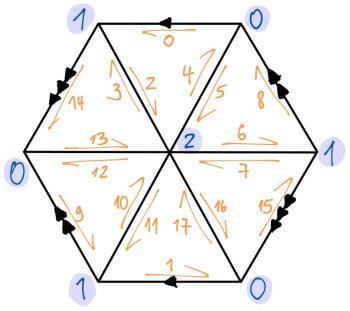

In [13]:
$f = $s->SECONDARY_FAN;
$f->VISUAL;

<!--
polymake for knusper
Thu Aug 27 11:35:32 2020
fan:
-->


 
 
 
 fan: 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

In [14]:
$s->properties;

name: s
type: HyperbolicSurface

DCEL_DATA
1 0 2 17
2 1 4 14
0 2 0 6
1 2 8 16
0 1 5 10
2 1 12 1
0 2 9 3
0 1 13 7
0 2 15 11


FLIP_WORDS
{0}
{}
{0 3}
{0 4 7}
{0 6}
{3}
{6}
{0 3 1 5}
{0 6 2 8}
{3 1 5}
{6 2 8}
{0 3 1 5 0 1}
{0 6 2 8 0 2}


PENNER_COORDINATES
2 1 1 1 1 1 1 1 1

SECONDARY_FAN
type: PolyhedralFan<Rational>

SPECIAL_POINT
1 0


In [15]:
$p = secondary_polyhedron($s,7);
$p->VISUAL(FacetColor=>'255 180 80');

<!--
polymake for knusper
Thu Aug 27 11:35:33 2020
p_bounded
-->


 
 
 
 p_bounded 
 
 
 
 
 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

In [16]:
$d0 = $s->gkz_dome(0,5);
$d0->VISUAL(FacetColor=>'80 180 255');

<!--
polymake for knusper
Thu Aug 27 11:35:37 2020
pcom:d0
-->


 
 
 
 pcom:d0 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

In [17]:
$s = new HyperbolicSurface(DCEL_DATA=>$T3, PENNER_COORDINATES=>[2,1,1,1,1,1,1,1,1], SPECIAL_POINT=>[new Rational(1.5196714),new Rational(-0.5773503)]);
$p = secondary_polyhedron($s,7);
$p->VISUAL(FacetColor=>'255 180 80');

<!--
polymake for knusper
Thu Aug 27 11:35:38 2020
p_bounded
-->


 
 
 
 p_bounded 
 
 
 
 
 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

In [18]:
$d0 = $s->gkz_dome(0,5);
$d0->VISUAL(FacetColor=>'80 180 255');

<!--
polymake for knusper
Thu Aug 27 11:35:43 2020
pcom:d0
-->


 
 
 
 pcom:d0 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

### More examples can be studied via the following:

In [19]:
# a torus with two cusps (6 edges)
$T2 = new Array<Array<Int>>([[0,0,6,5],[0,0,1,10],[0,0,8,2],[1,0,11,4],[1,0,7,3],[1,0,9,0]]);

# a sphere with four cusps (6 edges)
$S4 = new Array<Array<Int>>([[1,0,2,6],[2,1,4,9],[0,2,0,11],[3,0,8,5],[1,3,1,10],[2,3,3,7]]);

# a double torus with two cusps (12 edges)
$DT2 = new Array<Array<Int>>([[0,0,8,10],[0,0,12,14],[0,0,16,18],[0,0,20,22],[1,0,23,2],[1,0,13,3],[1,0,9,1],[1,0,11,4],[1,0,15,6],[1,0,21,7],[1,0,17,5],[1,0,19,0]]);

To study 4-dim. secondary fans the following method is useful. It intersects the secondary fan with the 3-dim. standard simplex.

In [20]:
sub norm($){
   my $B = new Matrix(shift);
   for (my $i = 0; $i < $B->rows(); ++$i) {
      my $sum = 0;
      for (my $j = 1; $j < $B->cols(); ++$j) {
         $sum = $sum + $B->elem($i,$j);
      }
      $x = 1/$sum;
      $B->row($i) = $x * $B->row($i);
   }
   return $B;
}

In [21]:
$s = new HyperbolicSurface(DCEL_DATA=>$S4,PENNER_COORDINATES=>[1,1,1,1,1,1],SPECIAL_POINT=>[1,0]);
$f = $s->SECONDARY_FAN;
$v = ones_vector | $f->RAYS;
$a = norm($v);
$b = $a->minor(All,~[0]);
$c = ones_vector | $b;

In [22]:
$q = new fan::PolyhedralComplex(POINTS=>$c,INPUT_POLYTOPES=>rows($f->MAXIMAL_CONES));
$pro = fan::project_full($q);
$pro->VISUAL;

<!--
polymake for knusper
Thu Aug 27 11:35:49 2020
pcom:pro
-->


 
 
 
 pcom:pro 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->